In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt

# 讀取資料
df = pd.read_csv('data/insurance.csv')

# 取出年齡與費用欄位
X = df[['age']].values
y = df['charges'].values
# 保留y值小於10000的資料
X = X[y < 10000]
y = y[y < 10000]

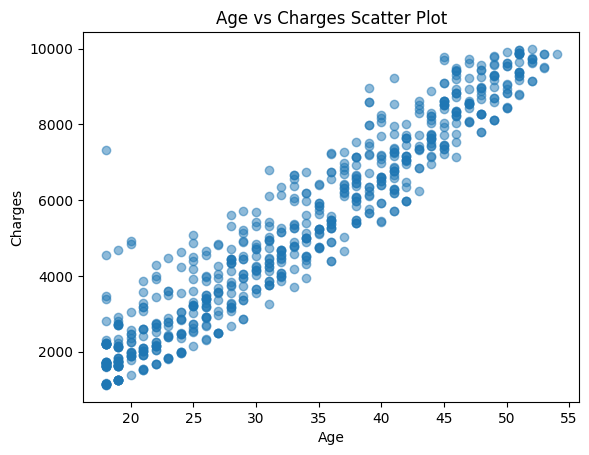

迴歸係數 (slope): 235.39205508240352
截距 (intercept): -2582.1955098700982


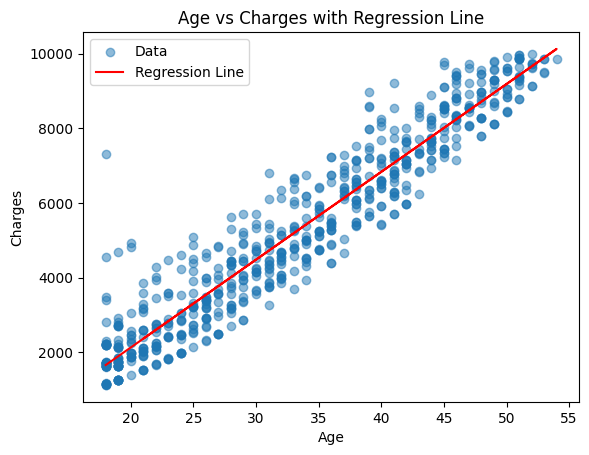

In [2]:
# 繪製散佈圖
plt.scatter(X, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges Scatter Plot')
plt.show()

# 線性迴歸
model = LinearRegression()
model.fit(X, y)

# 輸出係數與截距
print(f'迴歸係數 (slope): {model.coef_[0]}')
print(f'截距 (intercept): {model.intercept_}')

# 繪製迴歸線
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Regression Line')
plt.legend()
plt.show()

$$
w = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - w\bar{x}
$$


Least squares slope: 235.39205508240352
Least squares bias: -2582.1955098700982


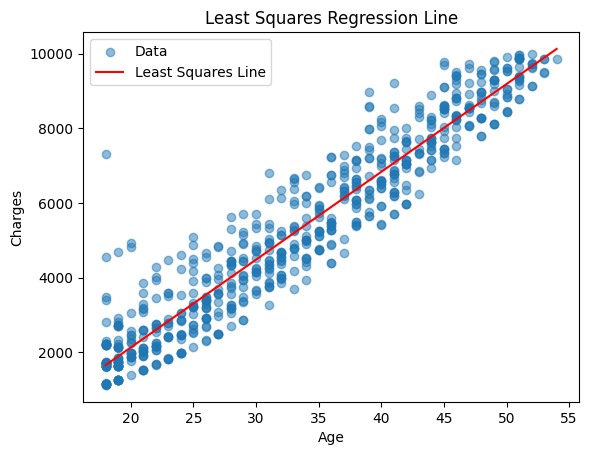

In [3]:
# Least squares solution for slope and bias
X_flat = X.flatten()
x_mean = np.mean(X_flat)
y_mean = np.mean(y)
cov_xy = np.sum((X_flat - x_mean) * (y - y_mean))
var_x = np.sum((X_flat - x_mean) ** 2)
slope_ls = cov_xy / var_x # weights
bias_ls = y_mean - slope_ls * x_mean # bias
print(f'Least squares slope: {slope_ls}')
print(f'Least squares bias: {bias_ls}')

# Predictions using least squares parameters
y_pred_ls = slope_ls * X_flat + bias_ls
sort_idx = np.argsort(X_flat)
plt.scatter(X_flat, y, alpha=0.5, label='Data')
plt.plot(X_flat[sort_idx], y_pred_ls[sort_idx], color='RED', label='Least Squares Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Least Squares Regression Line')
plt.legend()
plt.show()


## 多元線性迴歸

In [4]:
# 讀取資料
df = pd.read_csv('data/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# 取出年齡、BMI與費用欄位
X = df[['age', 'bmi']].values
y = df['charges'].values
# 保留y值小於10000的資料
X = X[y < 10000]
y = y[y < 10000]

迴歸係數 (slope): [235.80650754  -8.36999555]
截距 (intercept): -2342.631273169686


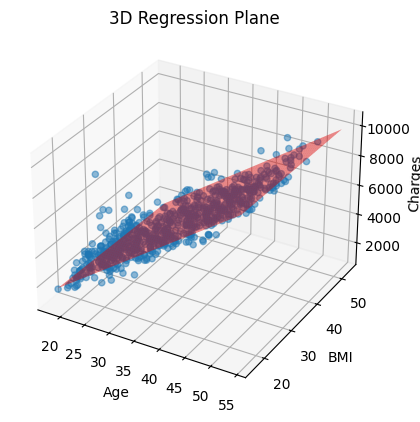

In [6]:
# 多元性迴歸
model = LinearRegression()
model.fit(X, y)

# 輸出所有係數與截距
print(f'迴歸係數 (slope): {model.coef_}')
print(f'截距 (intercept): {model.intercept_}')

# 繪製3D迴歸線
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.5, label='Data')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
# 繪製迴歸平面
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Regression Plane')
plt.title('3D Regression Plane')
plt.show()

In [8]:
# 使用plotly繪製3D迴歸線
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(size=5, opacity=0.5))])
# 繪製迴歸平面
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf
fig.add_trace(go.Surface(x=x_surf, y=y_surf, z=z_surf, colorscale='Reds', opacity=0.5, name='Regression Plane'))
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='BMI', zaxis_title='Charges'),
                  title='3D Regression Plane with Plotly')
fig.show()

$$
\hat{\beta} = (X^{T}X)^{-1}X^{T}Y
$$

In [9]:
# 使用 β=(𝑋^𝑇 𝑋)^(−1) 𝑋^𝑇 𝑌的公式再算一次，並輸出係數
X_b = np.c_[np.ones(X.shape[0]), X] # 在X前面加一欄1，代表bias
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f'係數 (slope): {beta[1:]}')
print(f'截距 (intercept): {beta[0]}')

係數 (slope): [235.80650754  -8.36999555]
截距 (intercept): -2342.6312731696694
